### Ejercicio 01: Predicción de Presión Arterial Sistólica usando Regresión Lineal

**Objetivo**: Desarrollar un modelo de regresión lineal simple y múltiple para 
predecir la presión arterial sistólica (PA) de pacientes, usando variables 
como la edad, el índice de masa corporal (IMC) y el nivel de colesterol. 

**Instrucciones:**

1. Generación de Datos: 
- Simula un dataset de 300 pacientes con las siguientes variables: 
    - edad: entre 18 y 80 años. 
    - imc: valores entre 18 y 38, siguiendo una distribución 
        normal. 
    - colesterol: valores entre 130 y 300 mg/dL. 
    - pa_sistolica: variable dependiente, relacionada 
        positivamente con edad, IMC y colesterol, más un componente 
        aleatorio.

2. Exploración de Datos: 
- Visualiza una muestra de los datos y obtén estadísticas 
descriptivas. 
- Genera histogramas para analizar la distribución de cada variable. 
- Crea una matriz de correlación para observar las relaciones entre 
variables. 
- Realiza gráficos de dispersión entre la PA sistólica y cada 
variable independiente. 

3. Regresión Lineal Simple: 
- Desarrolla un modelo de regresión lineal simple para cada 
predictor (edad, imc, colesterol) por separado. 
- Divide los datos en conjunto de entrenamiento (70%) y prueba 
(30%). 
- Entrena el modelo y realiza predicciones sobre el conjunto de 
prueba. 
- Evalúa el modelo usando el Error Cuadrático Medio (MSE) y el 
coeficiente de determinación (R²). 
- Visualiza la relación entre los valores reales y predichos para 
cada modelo. 
- Usa una librería estadística para obtener el resumen del modelo y 
analizar significancia de coeficientes. 


4. Regresión Lineal Múltiple: 
- Construye un modelo de regresión múltiple usando edad, imc y 
colesterol como predictores. 
- Realiza el mismo procedimiento de división de datos, 
entrenamiento, predicción y evaluación. 
- Obtén y analiza los coeficientes de cada variable.

5. Evaluación de Modelos: 
- Compara el desempeño de los modelos simples con el modelo 
múltiple. 
- Determina qué variable tiene mayor impacto en la predicción de la 
PA sistólica. 

6. Visualización de Resultados: 
- Grafica los residuos del modelo múltiple para verificar la 
distribución y homogeneidad. 
- Compara gráficamente los valores predichos y reales.

7. Conclusiones: 
- Interpreta los coeficientes y la importancia de cada variable. 
- Discute las implicaciones clínicas de los resultados obtenidos. 

Pistas: 
- Usa librerías como pandas, numpy, matplotlib, seaborn, scikit-learn y 
statsmodels. 
- Asegúrate de aplicar buenas prácticas de preprocesamiento y 
visualización. 
- Presta atención a la significancia estadística de los coeficientes y la 
interpretación de los valores R² y MSE. 
- En la regresión múltiple, observa posibles colinealidades entre 
variables. 

Producto esperado: Un informe que incluya: 
- Visualizaciones descriptivas. 
- Resultados de los modelos (coeficientes, MSE, R²). 
- Gráficos de predicciones vs valores reales. 
- Análisis de residuos. 
- Conclusiones bien fundamentadas.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm

In [24]:
'''Generación de Datos: 
- Simula un dataset de 300 pacientes con las siguientes variables: 
    - edad: entre 18 y 80 años. 
    - imc: valores entre 18 y 38, siguiendo una distribución 
        normal. 
    - colesterol: valores entre 130 y 300 mg/dL. 
    - pa_sistolica: variable dependiente, relacionada 
        positivamente con edad, IMC y colesterol, más un componente 
        aleatorio.'''

# Establecer la semilla para la reproducibilidad
np.random.seed(42)
# Número de pacientes
n_pacientes = 300
# Generar datos
edad = np.random.randint(18, 81, size=n_pacientes)  # Edad entre 18 y 80 años
imc = np.random.normal(loc=28, scale=4, size=n_pacientes)  # IMC con media 28 y desviación estándar 4
imc = np.clip(imc, 18, 38)  # Limitar el IMC entre 18 y 38
colesterol = np.random.randint(130, 301, size=n_pacientes)  # Colesterol entre 130 y 300 mg/dL
# Generar PA sistólica como una función de edad, IMC y colesterol, más un componente aleatorio
# Coeficientes arbitrarios para la relación
coef_edad = 0.5
coef_imc = 1.2
coef_colesterol = 0.3
ruido = np.random.normal(0, 5, size=n_pacientes)  # Componente aleatorio
# PA sistólica
pa_sistolica = (coef_edad * edad) + (coef_imc * imc) + (coef_colesterol * colesterol) + ruido
pa_sistolica = np.clip(pa_sistolica, 90, 200)  # Limitar la PA sistólica a un rango razonable
# Crear el DataFrame
df = pd.DataFrame({
    'edad': edad,
    'imc': imc,
    'colesterol': colesterol,
    'pa_sistolica': pa_sistolica
})
# Mostrar las primeras filas del DataFrame
print(df.head())

   edad        imc  colesterol  pa_sistolica
0    56  27.861153         291    156.282240
1    69  23.325288         247    138.600518
2    46  32.571291         132     99.947916
3    32  31.007732         252    132.954972
4    60  31.164128         179    127.531828


Muestra de los datos:
   edad        imc  colesterol  pa_sistolica
0    56  27.861153         291    156.282240
1    69  23.325288         247    138.600518
2    46  32.571291         132     99.947916
3    32  31.007732         252    132.954972
4    60  31.164128         179    127.531828

Estadísticas descriptivas:
             edad         imc  colesterol  pa_sistolica
count  300.000000  300.000000  300.000000    300.000000
mean    50.533333   28.196664  211.173333    122.405516
std     18.916881    3.768482   48.524758     17.493410
min     18.000000   18.000000  130.000000     90.000000
25%     34.000000   25.213602  168.750000    109.203943
50%     51.500000   28.315357  208.000000    122.747587
75%     67.250000   30.665990  252.500000    135.914458
max     80.000000   38.000000  299.000000    174.888017


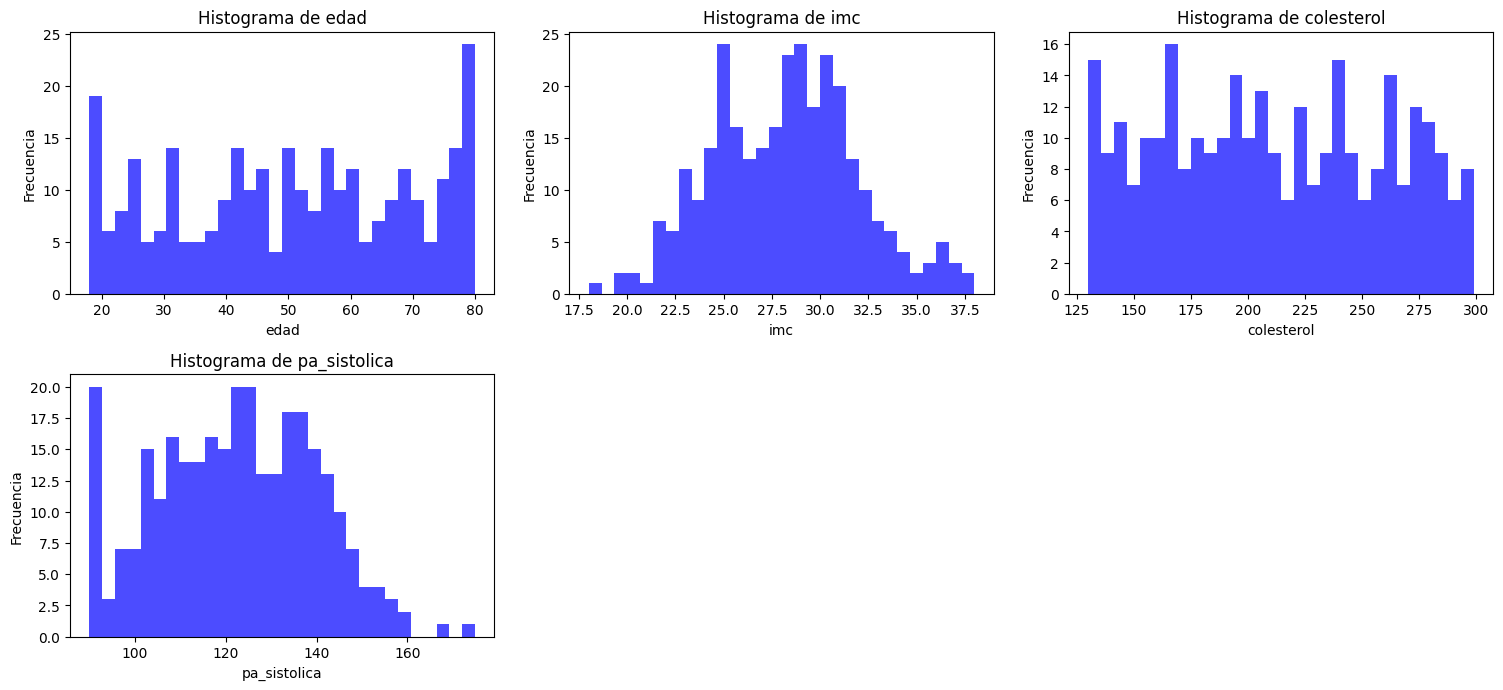

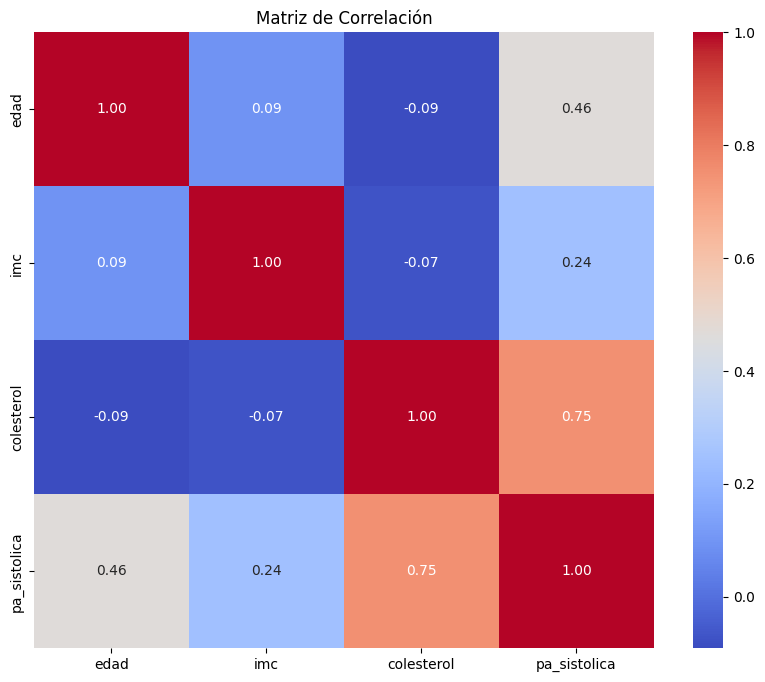

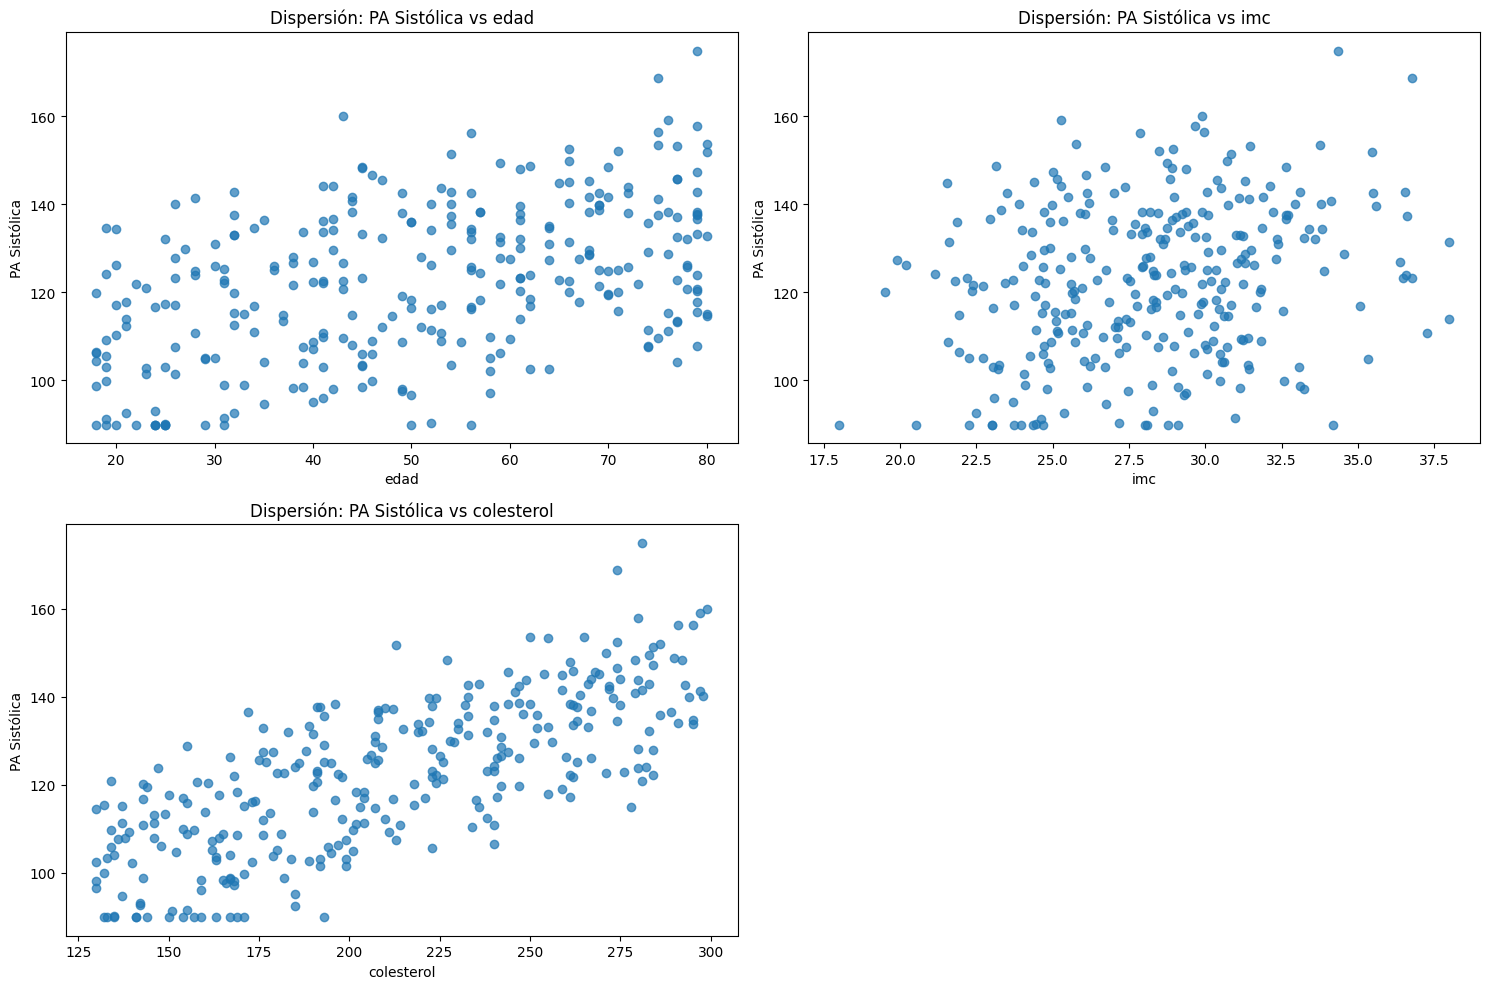

In [25]:
'''Exploración de Datos: 
- Visualiza una muestra de los datos y obtén estadísticas 
descriptivas. 
- Genera histogramas para analizar la distribución de cada variable. 
- Crea una matriz de correlación para observar las relaciones entre 
variables. 
- Realiza gráficos de dispersión entre la PA sistólica y cada 
variable independiente. '''

# 1. Visualiza una muestra de los datos
print("Muestra de los datos:")
print(df.head())
# 2. Obtén estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe())
# 3. Genera histogramas para analizar la distribución de cada variable
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 3, i)  # Ajusta el número de filas y columnas según tus variables
    plt.hist(df[column], bins=30, alpha=0.7, color='blue')
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()
# 4. Crea una matriz de correlación
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()
# 5. Realiza gráficos de dispersión entre la PA sistólica y cada variable independiente
plt.figure(figsize=(15, 10))
for i, column in enumerate(['edad', 'imc', 'colesterol'], 1):
    plt.subplot(2, 2, i)  # Ajusta el número de filas y columnas según tus variables
    plt.scatter(df[column], df['pa_sistolica'], alpha=0.7)
    plt.title(f'Dispersión: PA Sistólica vs {column}')
    plt.xlabel(column)
    plt.ylabel('PA Sistólica')
plt.tight_layout()
plt.show()








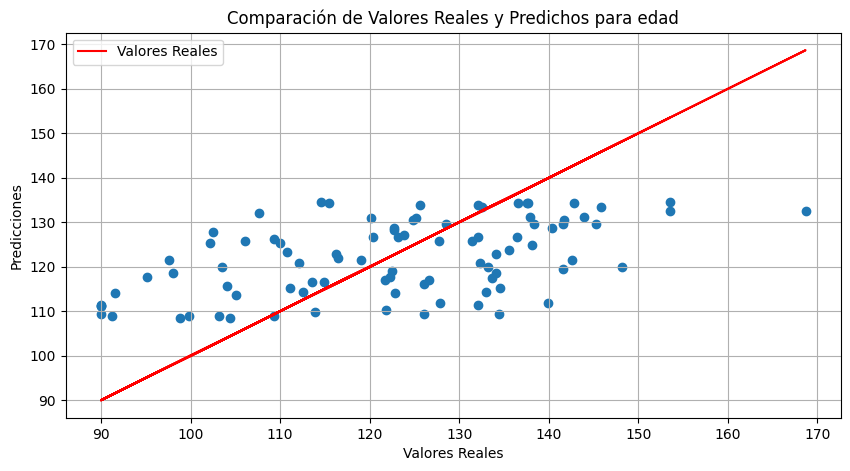

Resumen del modelo para edad:
                            OLS Regression Results                            
Dep. Variable:           pa_sistolica   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     50.20
Date:                Wed, 12 Mar 2025   Prob (F-statistic):           2.11e-11
Time:                        11:44:20   Log-Likelihood:                -878.64
No. Observations:                 210   AIC:                             1761.
Df Residuals:                     208   BIC:                             1768.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        100.9680 

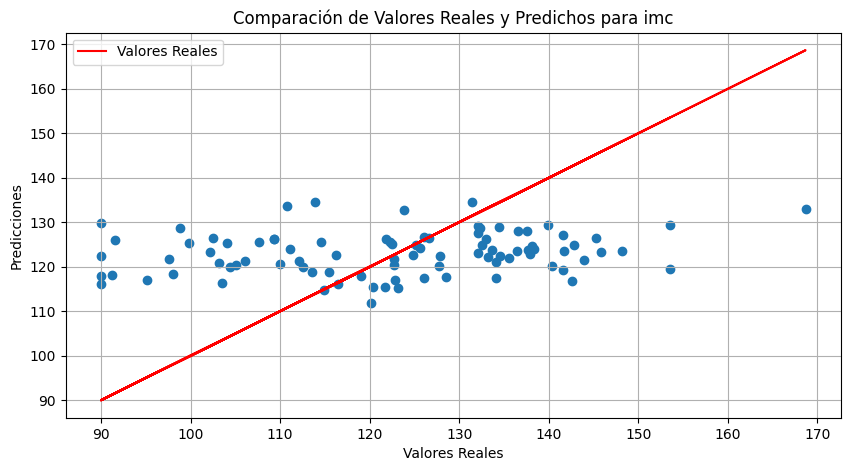

Resumen del modelo para imc:
                            OLS Regression Results                            
Dep. Variable:           pa_sistolica   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     14.76
Date:                Wed, 12 Mar 2025   Prob (F-statistic):           0.000162
Time:                        11:44:21   Log-Likelihood:                -894.14
No. Observations:                 210   AIC:                             1792.
Df Residuals:                     208   BIC:                             1799.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         87.8639  

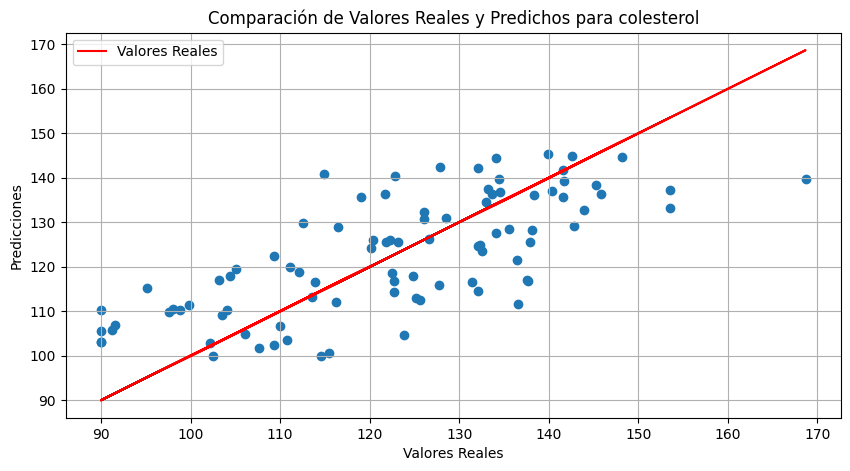

Resumen del modelo para colesterol:
                            OLS Regression Results                            
Dep. Variable:           pa_sistolica   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     289.1
Date:                Wed, 12 Mar 2025   Prob (F-statistic):           3.24e-41
Time:                        11:44:21   Log-Likelihood:                -809.87
No. Observations:                 210   AIC:                             1624.
Df Residuals:                     208   BIC:                             1630.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64

In [26]:
'''Regresión Lineal Simple: 
- Desarrolla un modelo de regresión lineal simple para cada 
predictor (edad, imc, colesterol) por separado. 
- Divide los datos en conjunto de entrenamiento (70%) y prueba 
(30%). 
- Entrena el modelo y realiza predicciones sobre el conjunto de 
prueba. 
- Evalúa el modelo usando el Error Cuadrático Medio (MSE) y el 
coeficiente de determinación (R²). 
- Visualiza la relación entre los valores reales y predichos para 
cada modelo. 
- Usa una librería estadística para obtener el resumen del modelo y 
analizar significancia de coeficientes.'''
# Definir los predictores
predictores = ['edad', 'imc', 'colesterol']
# Inicializar listas para almacenar resultados
resultados = []
for predictor in predictores:
    # Dividir los datos en conjunto de entrenamiento (70%) y prueba (30%)
    train_data, test_data = train_test_split(df, test_size=0.3, random_state=42)
    # Entrenar el modelo y realizar predicciones sobre el conjunto de prueba
    X_train = train_data[[predictor]]
    y_train = train_data['pa_sistolica']
    X_test = test_data[[predictor]]
    y_test = test_data['pa_sistolica']
    # Crear el modelo de regresión lineal
    model = LinearRegression()
    # Entrenar el modelo
    model.fit(X_train, y_train)
    # Realizar predicciones sobre el conjunto de prueba
    y_pred = model.predict(X_test)
    # Evaluar el modelo
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    # Almacenar los resultados
    resultados.append({'predictor': predictor, 'MSE': mse, 'R²': r2})
    # Visualizar la relación entre los valores reales y predichos
    plt.figure(figsize=(10, 5))
    plt.scatter(y_test, y_pred)
    plt.plot(y_test, y_test, color='red', label='Valores Reales')  # Línea de referencia
    plt.xlabel('Valores Reales')
    plt.ylabel('Predicciones')
    plt.title(f'Comparación de Valores Reales y Predichos para {predictor}')
    plt.legend()
    plt.grid()
    plt.show()
    # Usar statsmodels para obtener el resumen del modelo
    X_train_sm = sm.add_constant(X_train)  # Agregar constante para el intercepto
    model_sm = sm.OLS(y_train, X_train_sm).fit()  # Entrenar el modelo usando statsmodels
    print(f'Resumen del modelo para {predictor}:')
    print(model_sm.summary())
    print("\n" + "="*50 + "\n")
# Mostrar resultados finales
resultados_df = pd.DataFrame(resultados)
print(resultados_df)

MSE: 28.23484033045117
R²: 0.9013550897974465


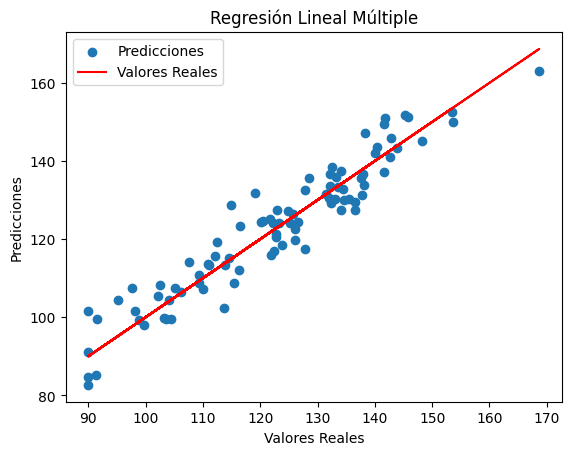

Resumen del modelo:
                            OLS Regression Results                            
Dep. Variable:           pa_sistolica   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     765.0
Date:                Wed, 12 Mar 2025   Prob (F-statistic):          2.31e-111
Time:                        11:44:22   Log-Likelihood:                -639.19
No. Observations:                 210   AIC:                             1286.
Df Residuals:                     206   BIC:                             1300.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0352      3.285

In [27]:
# Divide los datos en conjunto de entrenamiento (70%) y prueba (30%)
train_data, test_data = train_test_split(df, test_size=0.3, random_state=42)
# Entrena el modelo y realiza predicciones sobre el conjunto de prueba.
X_train = train_data[['edad', 'imc', 'colesterol']]
y_train = train_data['pa_sistolica']
X_test = test_data[['edad', 'imc', 'colesterol']]
y_test = test_data['pa_sistolica']
# Crear el modelo de regresión lineal
model = LinearRegression()
# Entrenar el modelo
model.fit(X_train, y_train)
# Realizar predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}')
print(f'R²: {r2}')
# Visualizar la relación entre los valores reales y predichos
plt.scatter(y_test, y_pred, label='Predicciones')
plt.plot(y_test, y_test, color='red', label='Valores Reales')  # Línea de referencia
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Regresión Lineal Múltiple')
plt.legend()
plt.show()
# Usa una librería estadística para obtener el resumen del modelo y analizar significancia de coeficientes.
X_train_sm = sm.add_constant(X_train)  # Agregar constante para el intercepto
model_sm = sm.OLS(y_train, X_train_sm).fit()  # Entrenar el modelo usando statsmodels
print('Resumen del modelo:')
print(model_sm.summary())

In [28]:
'''4. Regresión Lineal Múltiple: 
- Construye un modelo de regresión múltiple usando edad, imc y 
colesterol como predictores. 
- Realiza el mismo procedimiento de división de datos, 
entrenamiento, predicción y evaluación. 
- Obtén y analiza los coeficientes de cada variable.'''
# Preparar los datos
X = df[['edad', 'imc', 'colesterol']]
y = df['pa_sistolica']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión lineal múltiple
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Obtener y analizar los coeficientes de cada variable
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coeficiente'])
print(coefficients)

Mean Squared Error: 29.997985646968903
R^2 Score: 0.8987196300538085
            Coeficiente
edad           0.487585
imc            1.121783
colesterol     0.299004


In [29]:
'''5. Evaluación de Modelos: 
- Compara el desempeño de los modelos simples con el modelo 
múltiple. 
- Determina qué variable tiene mayor impacto en la predicción de la 
PA sistólica. '''
# Variables independientes
X = df.drop(columns=['pa_sistolica'])
y = df['pa_sistolica']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de regresión lineal múltiple
model_multiple = LinearRegression()
model_multiple.fit(X_train, y_train)
y_pred_multiple = model_multiple.predict(X_test)

# Evaluación del modelo múltiple
mse_multiple = mean_squared_error(y_test, y_pred_multiple)
r2_multiple = r2_score(y_test, y_pred_multiple)

print(f'Modelo Múltiple - MSE: {mse_multiple}, R²: {r2_multiple}')

# Evaluación de modelos simples
for column in X.columns:
    model_simple = LinearRegression()
    model_simple.fit(X_train[[column]], y_train)
    y_pred_simple = model_simple.predict(X_test[[column]])
    
    mse_simple = mean_squared_error(y_test, y_pred_simple)
    r2_simple = r2_score(y_test, y_pred_simple)
    
    print(f'Modelo Simple con {column} - MSE: {mse_simple}, R²: {r2_simple}')

# Determinar el impacto de cada variable en el modelo múltiple
coef_impact = pd.Series(model_multiple.coef_, index=X.columns).sort_values(ascending=False)
print("Impacto de cada variable en la predicción de la PA sistólica:")
print(coef_impact)

Modelo Múltiple - MSE: 29.997985646968903, R²: 0.8987196300538085
Modelo Simple con edad - MSE: 224.46465984327605, R²: 0.2421536547048072
Modelo Simple con imc - MSE: 276.67848964672197, R²: 0.06586728464532865
Modelo Simple con colesterol - MSE: 136.54555883472267, R²: 0.5389895549640835
Impacto de cada variable en la predicción de la PA sistólica:
imc           1.121783
edad          0.487585
colesterol    0.299004
dtype: float64


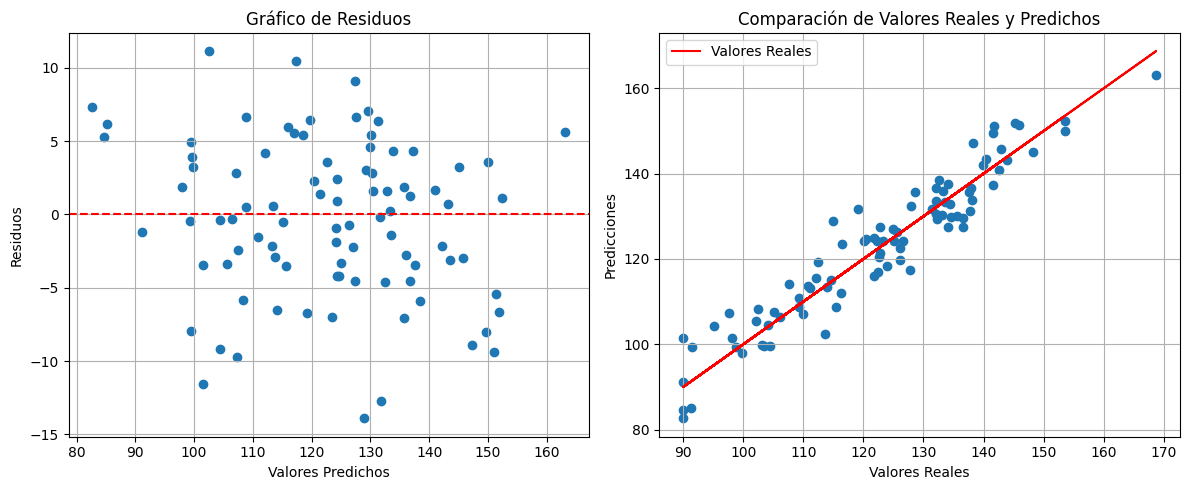

Resumen del modelo:
                            OLS Regression Results                            
Dep. Variable:           pa_sistolica   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     765.0
Date:                Wed, 12 Mar 2025   Prob (F-statistic):          2.31e-111
Time:                        13:06:12   Log-Likelihood:                -639.19
No. Observations:                 210   AIC:                             1286.
Df Residuals:                     206   BIC:                             1300.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0352      3.285

In [33]:
'''6. Visualización de Resultados: 
- Grafica los residuos del modelo múltiple para verificar la 
distribución y homogeneidad. 
- Compara gráficamente los valores predichos y reales.'''
# Calcular los residuos
residuos = y_test - y_pred
# Visualización de residuos
plt.figure(figsize=(12, 5))
# Gráfico de residuos
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuos)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos')
plt.grid()
# Comparar gráficamente los valores predichos y reales
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red', label='Valores Reales')  # Línea de referencia
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación de Valores Reales y Predichos')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
# Usa una librería estadística para obtener el resumen del modelo y analizar significancia de coeficientes.
X_train_sm = sm.add_constant(X_train)  # Agregar constante para el intercepto
model_sm = sm.OLS(y_train, X_train_sm).fit()  # Entrenar el modelo usando statsmodels
print('Resumen del modelo:')
print(model_sm.summary())